In [193]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

import sys

In [28]:
# Files are named the same way except they have different years, from 1999 t0 2016
counter = 0
df = {}    # Dataframe of dataframes
for y in range(1999, 2017):
    file = 'data/Freedom_of_Information_Requests__' + str(y) + '.csv'
    df[counter] = pd.read_csv(file)
    counter += 1




In [29]:
# Number of files read and turned into dataframes
len(df)

18

In [30]:
# Originally, index is set to zero. I want to to be set to '1'
for y in range(0, 18):
    #df[y].reset_index()
    df[y].index+=1

In [31]:
df[0].head(3)

,Request_Number,Request_Type,Source,Summary_of_Request,Decision,OBJECTID
1,99001,General Information,Business,Minutes of Service Delivery Subcommittee of ES...,Partly exempted,0
2,99002,General Information,Business,Public Health inspection reports for the {loca...,All disclosed,1
3,99003,General Information,Business,Public Health inspection records for {location...,Partly exempted,2


In [32]:
# Want to know if they have the same number of columns
for y in range(0, 18):
    print(df[y].shape)

(27, 6)
(19, 6)
(25, 6)
(20, 6)
(24, 6)
(22, 6)
(22, 6)
(23, 6)
(24, 6)
(30, 6)
(39, 6)
(29, 6)
(43, 6)
(41, 6)
(33, 6)
(30, 6)
(43, 6)
(82, 6)


In [33]:
df[0].shape[1]

6

In [34]:
# How to get the name of the columns
columnsNamesArr = df[0].columns.values
print(columnsNamesArr)
columnsNamesArr[5]

['Request_Number' 'Request_Type' 'Source' 'Summary_of_Request' 'Decision'
 'OBJECTID']


'OBJECTID'

In [41]:
# Start an array with the names of the columns for all the 18 files.
columnsNamesArr={}
for y in range(0, 18):
    columnsNamesArr[y] = df[y].columns.values

print(columnsNamesArr[1][0])
print(columnsNamesArr[15][0])
    
    

Request_Number
Request_Number:


In [42]:
# Find out if they have the same columns or not. Check with lower case, and strip spaces and colons
for i in range(0, 17):
    for j in range(0, df[0].shape[1]):
        #print(i, j)
        assert columnsNamesArr[i][j].lower().strip(' :') == columnsNamesArr[i+1][j].lower().strip(' :'), \
        "Columns are different %s %s" % (columnsNamesArr[i][j], columnsNamesArr[i+1][j]) 
        
        
        

In [43]:
# Just checking the range is correct
for j in range(0, df[0].shape[1]):
    print(j)
    
    

0
1
2
3
4
5


In [44]:
# Some columns have colons
print(columnsNamesArr[1][0])
print(columnsNamesArr[1][0], columnsNamesArr[15][0])

Request_Number
Request_Number Request_Number:


In [45]:
# Just checking the statement above
print(columnsNamesArr[1][0].lower().strip(' :'), columnsNamesArr[15][0].lower().strip(' :'))

request_number request_number


In [46]:
df[0].columns.values[0]

'Request_Number'

In [47]:
# Go directly to the dataframes and change the column names by stripping spaces and colons
for i in range(0, 18):
    for j in range(0, df[0].shape[1]):
        df[i].columns.values[j] = df[i].columns.values[j].strip(' :')
        

In [48]:
# Check if it worked
print(df[1].columns.values[0])
print(df[15].columns.values[0])

Request_Number
Request_Number


In [55]:
# Concatenate the dataframes into a single one
adf = pd.concat(df, ignore_index = True)

In [56]:
# Check shape
adf.shape

(576, 6)

In [57]:
adf.head(29)

,Request_Number,Request_Type,Source,Summary_of_Request,Decision,OBJECTID
0,99001,General Information,Business,Minutes of Service Delivery Subcommittee of ES...,Partly exempted,0
1,99002,General Information,Business,Public Health inspection reports for the {loca...,All disclosed,1
2,99003,General Information,Business,Public Health inspection records for {location...,Partly exempted,2
3,99004,General Information,Public,Public Health inspection records for {address ...,All disclosed,3
4,99005,General Information,Business,Vendor list report with total of year-to-date ...,All disclosed,4
5,99006,Personal Information,Public,Public Health inspection file for {name remove...,All disclosed,5
6,99007,General Information,Public,Scope of work and deliverables sections of con...,All disclosed,6
7,99008,General Information,Public,Number of contracts and dollar amount of contr...,Withdrawn,7
8,99009,Personal Information,Public,Public Health inspection report regarding a co...,All disclosed,8
9,99010,General Information,Business,Phase I environmental site assessment regardin...,Withdrawn,9


In [62]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
Request_Number        576 non-null int64
Request_Type          576 non-null object
Source                576 non-null object
Summary_of_Request    576 non-null object
Decision              576 non-null object
OBJECTID              576 non-null int64
dtypes: int64(2), object(4)
memory usage: 27.1+ KB


In [75]:
adf.Request_Type.unique()

array(['General Information', 'Personal Information', 'Correction',
       'Personal Information/General Information',
       'Personal Health Information/General Information',
       'Personal Health Information',
       'Personal Health Information/General Informaiton',
       'General Records', 'Personal', 'General'], dtype=object)

In [84]:
adf['Request_Type'] = adf['Request_Type'].str.strip()
print(adf.Request_Type.nunique())
adf.Request_Type.value_counts()

10


General Information                                283
Personal Information                               110
General                                             76
Personal                                            47
General Records                                     36
Personal Health Information/General Information     16
Personal Health Information                          3
Correction                                           2
Personal Information/General Information             2
Personal Health Information/General Informaiton      1
Name: Request_Type, dtype: int64

In [85]:
adf['Source'] = adf['Source'].str.strip()
print(adf.Source.nunique())
adf.Source.value_counts()

8


Business                    198
Public                      132
Individual by Agent         107
Individual by agent          59
Individual                   40
Media                        20
Business by Agent            19
Individual for dependant      1
Name: Source, dtype: int64

In [86]:
adf['Decision'] = adf['Decision'].str.strip()
print(adf.Decision.nunique())
adf.Decision.value_counts()

21


All disclosed                                      160
Partly exempted                                    102
Withdrawn                                           79
No records exist                                    51
Information disclosed in part                       50
Partly non-existent                                 23
Nothing disclosed                                   20
All Information disclosed                           16
No record exists                                    15
Abandoned                                           13
All information disclosed                           13
Forwarded out                                       12
No responsive records exist                         11
Non-existent                                         3
Transferred to Region of Waterloo Public Health      2
Correction refused                                   1
No additional records exist                          1
Correction granted                                   1
Transferre

In [87]:
adf['Request_Type'] = adf['Request_Type'].str.replace('Informaiton','Information')

In [91]:
print(adf.Request_Type.nunique())
adf.Request_Type.value_counts()

9


General Information                                283
Personal Information                               110
General                                             76
Personal                                            47
General Records                                     36
Personal Health Information/General Information     17
Personal Health Information                          3
Correction                                           2
Personal Information/General Information             2
Name: Request_Type, dtype: int64

In [92]:
adf['Source'] = adf['Source'].str.replace('Individual by agent','Individual by Agent')

In [93]:
print(adf.Source.nunique())
adf.Source.value_counts()

7


Business                    198
Individual by Agent         166
Public                      132
Individual                   40
Media                        20
Business by Agent            19
Individual for dependant      1
Name: Source, dtype: int64

In [94]:
adf['Decision'] = adf['Decision'].str.replace('Nothing disclosed','No information disclosed')

In [99]:
adf['Decision'] = adf['Decision'].str.replace('All disclosed','All information disclosed')

In [100]:
adf['Decision'] = adf['Decision'].str.replace('All Information disclosed','All information disclosed')

In [96]:
adf['Decision'] = adf['Decision'].str.replace('No record exists','No records exist')

In [97]:
adf['Decision'] = adf['Decision'].str.replace('Withdrawn','Request withdrawn')

In [101]:
print(adf.Decision.nunique())
adf.Decision.value_counts()

16


All information disclosed                          189
Partly exempted                                    102
Request withdrawn                                   80
No records exist                                    66
Information disclosed in part                       50
Partly non-existent                                 23
No information disclosed                            21
Abandoned                                           13
Forwarded out                                       12
No responsive records exist                         11
Non-existent                                         3
Transferred to Region of Waterloo Public Health      2
Transferred                                          1
Correction granted                                   1
Correction refused                                   1
No additional records exist                          1
Name: Decision, dtype: int64

In [ ]:
# Check Source: is Public == Individual?
# Check Decision: no responsive records exist == Non-existent == no records exist ?
#                 no additional records exist == partly non-existent ?
# Check Request_Type: General Information == General == General Records
#                    Personal Information == Personal

In [125]:
adf[(adf['Source'] == 'Public') | (adf['Source'] =='Individual')]

,Request_Number,Request_Type,Source,Summary_of_Request,Decision,OBJECTID
3,99004,General Information,Individual,Public Health inspection records for {address ...,All information disclosed,3
5,99006,Personal Information,Individual,Public Health inspection file for {name remove...,All information disclosed,5
6,99007,General Information,Individual,Scope of work and deliverables sections of con...,All information disclosed,6
7,99008,General Information,Individual,Number of contracts and dollar amount of contr...,Request withdrawn,7
8,99009,Personal Information,Individual,Public Health inspection report regarding a co...,All information disclosed,8
11,99012,Personal Information,Individual,A complete copy of Income Maintenance client f...,All information disclosed,11
13,99014,Personal Information,Individual,Home Child Care Provider file for {name remove...,Partly exempted,13
15,99016,Personal Information,Individual,Financial records documenting {name removed} e...,All information disclosed,15
16,99017,Personal Information,Individual,Minutes and notes relating to {name removed} m...,Partly exempted,16
18,99019,General Information,Individual,List of all radio frequencies used by Region o...,Forwarded out,18


In [122]:
# Pre 2015, there were no invidivual requests, just public, post 2015, there are no public requests, just Invididual.


In [123]:
adf['Source'] = adf['Source'].str.replace('Public','Individual')

In [124]:
print(adf.Source.nunique())
adf.Source.value_counts()

6


Business                    198
Individual                  172
Individual by Agent         166
Media                        20
Business by Agent            19
Individual for dependant      1
Name: Source, dtype: int64

In [126]:
adf[(adf['Decision'] == 'No responsive records exist') | (adf['Decision'] =='Non-existent')]

,Request_Number,Request_Type,Source,Summary_of_Request,Decision,OBJECTID
430,2014010,Personal Information,Individual by Agent,A complete copy of Ontario Works client file f...,Non-existent,9
431,2014011,Personal Information,Individual by Agent,A complete copy of Ontario Works client file f...,Non-existent,10
449,2014029,Personal Information,Individual by Agent,Notes of the nurse/employee who visited {name ...,Non-existent,28
451,2015001,Personal,Individual by Agent,Copy of any Ontario Disability Service Program...,No responsive records exist,0
452,2015002,Personal,Individual by Agent,Ontario Works client file {name removed} from...,No responsive records exist,1
457,2015007,Personal,Individual by Agent,Complete copy of {name removed} Social Assista...,No responsive records exist,6
459,2015009,Personal,Individual by Agent,Complete copy of {name removed} Ontario Disabi...,No responsive records exist,8
462,2015012,Personal,Individual by Agent,Copy of {name removed} Ontario Works File from...,No responsive records exist,11
469,2015019,General,Individual,"Development agreement, all maps as well as com...",No responsive records exist,18
476,2015026,Personal,Individual,"A copy of video surveillance for May 28, 2015 ...",No responsive records exist,25


In [127]:
adf['Decision'] = adf['Decision'].str.replace('No responsive records exist','No records exist')

In [128]:
adf['Decision'] = adf['Decision'].str.replace('Non-existent','No records exist')

In [129]:
print(adf.Decision.nunique())
adf.Decision.value_counts()

14


All information disclosed                          189
Partly exempted                                    102
No records exist                                    80
Request withdrawn                                   80
Information disclosed in part                       50
Partly non-existent                                 23
No information disclosed                            21
Abandoned                                           13
Forwarded out                                       12
Transferred to Region of Waterloo Public Health      2
Transferred                                          1
Correction granted                                   1
Correction refused                                   1
No additional records exist                          1
Name: Decision, dtype: int64

In [130]:
adf[(adf['Decision'] == 'No additional records exist')]

,Request_Number,Request_Type,Source,Summary_of_Request,Decision,OBJECTID
520,2016027,General,Individual,Follow up to request 2016018 for 1) Traffic S...,No additional records exist,26


In [134]:
adf[(adf['Decision'] == 'Forwarded out') | (adf['Decision'] =='Transferred')]

,Request_Number,Request_Type,Source,Summary_of_Request,Decision,OBJECTID
18,99019,General Information,Individual,List of all radio frequencies used by Region o...,Forwarded out,18
42,2000016,General Information,Individual,Letter regarding pay equity plan to {name remo...,Forwarded out,15
62,2001017,General Information,Individual,Information regarding speed detection unit use...,Forwarded out,16
69,2001024,General Information,Individual,Ice rental rate for the City of Kitchener Tim ...,Forwarded out,23
102,2003012,Personal Information,Individual by Agent,Rabies control records for incident that occur...,Forwarded out,11
106,2003016,Personal Information,Individual by Agent,A complete copy of Ontario Works client file f...,Forwarded out,15
119,2004005,General Information,Individual,Records related to laser speed detection unit ...,Forwarded out,4
137,2005001,General Information,Business,Current monthly cost of janitorial services fo...,Forwarded out,0
191,2007010,General Information,Individual by Agent,"Work orders related to {locations removed}, Wa...",Forwarded out,9
385,2012039,General Information,Individual,Property standards inspections regarding balco...,Forwarded out,38


In [135]:
adf['Decision'] = adf['Decision'].str.replace('Forwarded out','Transferred')

In [136]:
print(adf.Decision.nunique())
adf.Decision.value_counts()

13


All information disclosed                          189
Partly exempted                                    102
No records exist                                    80
Request withdrawn                                   80
Information disclosed in part                       50
Partly non-existent                                 23
No information disclosed                            21
Transferred                                         13
Abandoned                                           13
Transferred to Region of Waterloo Public Health      2
Correction granted                                   1
Correction refused                                   1
No additional records exist                          1
Name: Decision, dtype: int64

In [137]:
adf[(adf['Decision'] == 'Partly exempted') | (adf['Decision'] =='Information disclosed in part')]

,Request_Number,Request_Type,Source,Summary_of_Request,Decision,OBJECTID
0,99001,General Information,Business,Minutes of Service Delivery Subcommittee of ES...,Partly exempted,0
2,99003,General Information,Business,Public Health inspection records for {location...,Partly exempted,2
12,99013,General Information,Individual by Agent,Rabies control records related to dog bite aff...,Partly exempted,12
13,99014,Personal Information,Individual,Home Child Care Provider file for {name remove...,Partly exempted,13
16,99017,Personal Information,Individual,Minutes and notes relating to {name removed} m...,Partly exempted,16
21,99022,Personal Information,Individual,"Complaint dated November 1, 1999 in {name remo...",Partly exempted,21
23,99024,Personal Information,Individual,Home Child Care Provider file for {name remove...,Partly exempted,23
29,2000003,General Information,Business by Agent,Public Health Inspection reports and records r...,Partly exempted,2
31,2000005,Personal Information,Individual,Public Health Inspection reports about food-bo...,Partly exempted,4
34,2000008,Personal Information,Individual,Public Health Inspection reports and laborator...,Partly exempted,7


In [138]:
# Up to 2015, it was called Partly exempted, not it is known as 'Information disclosed in part'
adf['Decision'] = adf['Decision'].str.replace('Partly exempted','Information disclosed in part')

In [139]:
print(adf.Decision.nunique())
adf.Decision.value_counts()

12


All information disclosed                          189
Information disclosed in part                      152
No records exist                                    80
Request withdrawn                                   80
Partly non-existent                                 23
No information disclosed                            21
Transferred                                         13
Abandoned                                           13
Transferred to Region of Waterloo Public Health      2
Correction granted                                   1
Correction refused                                   1
No additional records exist                          1
Name: Decision, dtype: int64

In [158]:
adf[(adf['Decision'].str.contains('Transferred to Region of Waterloo Public Health'))]

,Request_Number,Request_Type,Source,Summary_of_Request,Decision,OBJECTID
482,2015032,Personal Health Information,Individual by Agent,"Investigation file and notes of Natan Somer, P...",Transferred to Region of Waterloo Public Health,31
487,2015037,Personal Health Information,Individual,Copy of a report from the early 1990's about a...,Transferred to Region of Waterloo Public Health,36


In [159]:
adf['Decision'] = adf['Decision'].str.replace('Transferred to Region of Waterloo Public Health','Transferred')

In [160]:
print(adf.Decision.nunique())
adf.Decision.value_counts()

11


All information disclosed        189
Information disclosed in part    152
No records exist                  80
Request withdrawn                 80
Partly non-existent               23
No information disclosed          21
Transferred                       15
Abandoned                         13
Correction granted                 1
Correction refused                 1
No additional records exist        1
Name: Decision, dtype: int64

In [140]:
# Check Request_Type: General Information == General == General Records
#                    Personal Information == Personal

In [142]:
adf[(adf['Request_Type'] == 'General Information') | (adf['Request_Type'] =='General Records')]

,Request_Number,Request_Type,Source,Summary_of_Request,Decision,OBJECTID
0,99001,General Information,Business,Minutes of Service Delivery Subcommittee of ES...,Information disclosed in part,0
1,99002,General Information,Business,Public Health inspection reports for the {loca...,All information disclosed,1
2,99003,General Information,Business,Public Health inspection records for {location...,Information disclosed in part,2
3,99004,General Information,Individual,Public Health inspection records for {address ...,All information disclosed,3
4,99005,General Information,Business,Vendor list report with total of year-to-date ...,All information disclosed,4
6,99007,General Information,Individual,Scope of work and deliverables sections of con...,All information disclosed,6
7,99008,General Information,Individual,Number of contracts and dollar amount of contr...,Request withdrawn,7
9,99010,General Information,Business,Phase I environmental site assessment regardin...,Request withdrawn,9
10,99011,General Information,Business,Complete fiscal year end vendor report for yea...,Partly non-existent,10
12,99013,General Information,Individual by Agent,Rabies control records related to dog bite aff...,Information disclosed in part,12


In [143]:
adf[(adf['Request_Type'] == 'General Information') | (adf['Request_Type'] =='General')]

,Request_Number,Request_Type,Source,Summary_of_Request,Decision,OBJECTID
0,99001,General Information,Business,Minutes of Service Delivery Subcommittee of ES...,Information disclosed in part,0
1,99002,General Information,Business,Public Health inspection reports for the {loca...,All information disclosed,1
2,99003,General Information,Business,Public Health inspection records for {location...,Information disclosed in part,2
3,99004,General Information,Individual,Public Health inspection records for {address ...,All information disclosed,3
4,99005,General Information,Business,Vendor list report with total of year-to-date ...,All information disclosed,4
6,99007,General Information,Individual,Scope of work and deliverables sections of con...,All information disclosed,6
7,99008,General Information,Individual,Number of contracts and dollar amount of contr...,Request withdrawn,7
9,99010,General Information,Business,Phase I environmental site assessment regardin...,Request withdrawn,9
10,99011,General Information,Business,Complete fiscal year end vendor report for yea...,Partly non-existent,10
12,99013,General Information,Individual by Agent,Rabies control records related to dog bite aff...,Information disclosed in part,12


In [144]:
adf[(adf['Request_Type'] == 'Personal Information') | (adf['Request_Type'] =='Personal')]

,Request_Number,Request_Type,Source,Summary_of_Request,Decision,OBJECTID
5,99006,Personal Information,Individual,Public Health inspection file for {name remove...,All information disclosed,5
8,99009,Personal Information,Individual,Public Health inspection report regarding a co...,All information disclosed,8
11,99012,Personal Information,Individual,A complete copy of Income Maintenance client f...,All information disclosed,11
13,99014,Personal Information,Individual,Home Child Care Provider file for {name remove...,Information disclosed in part,13
15,99016,Personal Information,Individual,Financial records documenting {name removed} e...,All information disclosed,15
16,99017,Personal Information,Individual,Minutes and notes relating to {name removed} m...,Information disclosed in part,16
20,99021,Personal Information,Individual,{Name removed} personnel file for the period 1...,Request withdrawn,20
21,99022,Personal Information,Individual,"Complaint dated November 1, 1999 in {name remo...",Information disclosed in part,21
23,99024,Personal Information,Individual,Home Child Care Provider file for {name remove...,Information disclosed in part,23
26,99027,Personal Information,Individual,Complaint regarding alleged fraud accusation m...,Request withdrawn,26


In [145]:
adf['Request_Type'] = adf['Request_Type'].str.replace('Personal Information','Personal')

In [146]:
adf['Request_Type'] = adf['Request_Type'].str.replace('General Information','General')

In [147]:
adf['Request_Type'] = adf['Request_Type'].str.replace('General Records','General')

In [148]:
print(adf.Request_Type.nunique())
adf.Request_Type.value_counts()

6


General                                395
Personal                               157
Personal Health Information/General     17
Personal Health Information              3
Personal/General                         2
Correction                               2
Name: Request_Type, dtype: int64

In [149]:
adf[(adf['Request_Type'] == 'Personal Health Information/General') | (adf['Request_Type'] =='Personal Health Information')
   | (adf['Request_Type'] =='Personal/General')]




,Request_Number,Request_Type,Source,Summary_of_Request,Decision,OBJECTID
78,2002008,Personal/General,Individual by Agent,Rabies incident report records regarding May 2...,All information disclosed,7
89,2002019,Personal/General,Individual by Agent,Food-borne illness incident records for {locat...,All information disclosed,18
120,2004006,Personal Health Information/General,Individual,Rabies control investigation from April 2003 r...,Information disclosed in part,5
127,2004013,Personal Health Information/General,Individual by Agent,Rabies control investigation file.,Information disclosed in part,12
152,2005016,Personal Health Information/General,Individual by Agent,Food premise inspections of {location removed}...,All information disclosed,15
158,2005022,Personal Health Information/General,Individual by Agent,Rabies control investigation file regarding do...,Information disclosed in part,21
169,2006011,Personal Health Information,Individual,Ambulance Call Report for Emergency Medical Se...,Request withdrawn,10
177,2006019,Personal Health Information/General,Individual,Rabies control investigation file.,All information disclosed,18
182,2007001,Personal Health Information/General,Individual,Public Health investigation file regarding e-c...,Information disclosed in part,0
186,2007005,Personal Health Information/General,Individual,Public Health investigation records regarding ...,Information disclosed in part,4


In [153]:
adf[(adf['Summary_of_Request'].str.contains('rabies')) | (adf['Summary_of_Request'].str.contains('Rabies'))]

,Request_Number,Request_Type,Source,Summary_of_Request,Decision,OBJECTID
12,99013,General,Individual by Agent,Rabies control records related to dog bite aff...,Information disclosed in part,12
78,2002008,Personal/General,Individual by Agent,Rabies incident report records regarding May 2...,All information disclosed,7
101,2003011,Personal,Individual by Agent,Rabies control records from an incident occurr...,Information disclosed in part,10
102,2003012,Personal,Individual by Agent,Rabies control records for incident that occur...,Transferred,11
112,2003022,General,Individual,Rabies control investigation records regarding...,Information disclosed in part,21
120,2004006,Personal Health Information/General,Individual,Rabies control investigation from April 2003 r...,Information disclosed in part,5
127,2004013,Personal Health Information/General,Individual by Agent,Rabies control investigation file.,Information disclosed in part,12
143,2005007,General,Individual by Agent,Owner name and address in rabies control inves...,Information disclosed in part,6
146,2005010,General,Business,Rabies control investigation file for incident...,Information disclosed in part,9
158,2005022,Personal Health Information/General,Individual by Agent,Rabies control investigation file regarding do...,Information disclosed in part,21


In [156]:
adf[(adf['Summary_of_Request'].str.contains('Food-borne')) | (adf['Summary_of_Request'].str.contains('Food borne'))
   | (adf['Summary_of_Request'].str.contains('food borne')) | (adf['Summary_of_Request'].str.contains('food-borne'))]

,Request_Number,Request_Type,Source,Summary_of_Request,Decision,OBJECTID
31,2000005,Personal,Individual,Public Health Inspection reports about food-bo...,Information disclosed in part,4
32,2000006,General,Individual,Public Health Inspection report dated March 20...,All information disclosed,5
34,2000008,Personal,Individual,Public Health Inspection reports and laborator...,Information disclosed in part,7
89,2002019,Personal/General,Individual by Agent,Food-borne illness incident records for {locat...,All information disclosed,18
94,2003004,Personal,Individual by Agent,Records regarding alleged food borne illness a...,All information disclosed,3
129,2004015,Personal,Individual by Agent,Food-borne illness incident records from {loca...,All information disclosed,14
152,2005016,Personal Health Information/General,Individual by Agent,Food premise inspections of {location removed}...,All information disclosed,15
185,2007004,General,Business by Agent,Food-borne illness investigation at {company r...,All information disclosed,3
190,2007009,Personal Health Information/General,Individual by Agent,Food borne illness investigation at {location ...,No records exist,8
201,2007020,General,Business by Agent,Food-borne illness complaint investigation reg...,Information disclosed in part,19


In [163]:
# ObjectID is just the order in which the requests arrived during the year.
adf = adf.drop(columns=['OBJECTID'])

In [164]:
adf.head(4)

,Request_Number,Request_Type,Source,Summary_of_Request,Decision
0,99001,General,Business,Minutes of Service Delivery Subcommittee of ES...,Information disclosed in part
1,99002,General,Business,Public Health inspection reports for the {loca...,All information disclosed
2,99003,General,Business,Public Health inspection records for {location...,Information disclosed in part
3,99004,General,Individual,Public Health inspection records for {address ...,All information disclosed


In [203]:
adf_business_groupby_Decision = adf[adf['Source'] == 'Business'].groupby('Decision')\
                                      .count()[['Source']]
adf_business_groupby_Decision



,Source
Decision,
Abandoned,3
All information disclosed,64
Information disclosed in part,36
No information disclosed,2
No records exist,43
Partly non-existent,10
Request withdrawn,38
Transferred,2


In [196]:
adf_individual_groupby_Decision = adf[adf['Source'] == 'Individual'].groupby('Decision').count()[['Source']]
adf_individual_groupby_Decision

,Source
Decision,
Abandoned,5
All information disclosed,56
Correction granted,1
Correction refused,1
Information disclosed in part,45
No additional records exist,1
No information disclosed,10
No records exist,14
Partly non-existent,9


In [199]:
adf_businessbyAgent_groupby_Decision = adf[adf['Source'] == 'Business by Agent'].groupby('Decision')\
                                           .count()[['Source']]

adf_businessbyAgent_groupby_Decision



,Source
Decision,
All information disclosed,4
Information disclosed in part,6
No information disclosed,2
No records exist,2
Request withdrawn,5


In [200]:
adf_individualbyAgent_groupby_Decision = adf[adf['Source'] == 'Individual by Agent'].groupby('Decision').\
                                             count()[['Source']]
adf_individualbyAgent_groupby_Decision



,Source
Decision,
Abandoned,4
All information disclosed,63
Information disclosed in part,56
No information disclosed,1
No records exist,20
Partly non-existent,3
Request withdrawn,13
Transferred,6


In [201]:
adf_media_groupby_Decision = adf[adf['Source'] == 'Media'].groupby('Decision').\
                                 count()[['Source']]
adf_media_groupby_Decision


,Source
Decision,
All information disclosed,2
Information disclosed in part,9
No information disclosed,6
No records exist,1
Partly non-existent,1
Request withdrawn,1


In [204]:
adf_groupbyDecision = adf.groupby('Decision').count()[['Source']]
adf_groupbyDecision

,Source
Decision,
Abandoned,13
All information disclosed,189
Correction granted,1
Correction refused,1
Information disclosed in part,152
No additional records exist,1
No information disclosed,21
No records exist,80
Partly non-existent,23


In [184]:
print(adf.Decision.nunique())
print(adf.Decision.unique())
print(adf.Decision.unique()[0])

11
['Information disclosed in part' 'All information disclosed'
 'Request withdrawn' 'Partly non-existent' 'Transferred'
 'No records exist' 'No information disclosed' 'Correction refused'
 'Correction granted' 'Abandoned' 'No additional records exist']
Information disclosed in part


In [252]:
type(adf.Decision.unique())

numpy.ndarray

In [192]:
columns=[]
for i in range(0,adf.Decision.nunique()):
    columns.append(adf.Decision.unique()[i])

print(len(columns))
print(columns)
print(columns[0])

11
['Information disclosed in part', 'All information disclosed', 'Request withdrawn', 'Partly non-existent', 'Transferred', 'No records exist', 'No information disclosed', 'Correction refused', 'Correction granted', 'Abandoned', 'No additional records exist']
Information disclosed in part


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

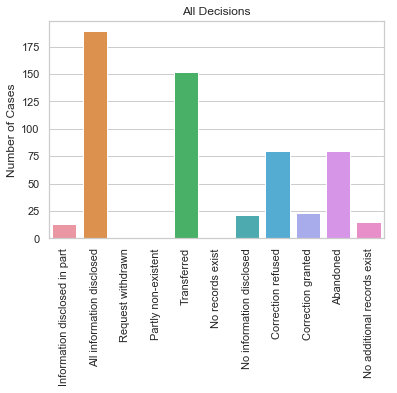

In [218]:
sns.set(style="whitegrid")
ax = sns.barplot(x = columns, y = 'Source', data = adf_groupbyDecision)
ax.set(ylabel = 'Number of Cases', title = 'All Decisions')
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

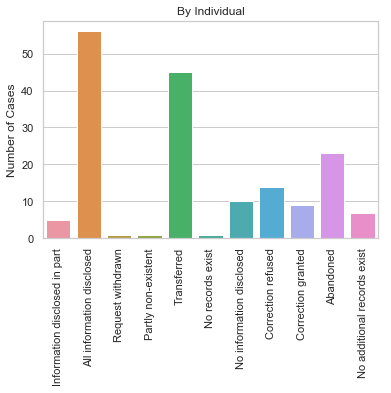

In [221]:
# Wrong order for columns
sns.set(style="whitegrid")
ax = sns.barplot(x = columns, y = 'Source', data = adf_individual_groupby_Decision)
ax.set(ylabel = 'Number of Cases', title = 'By Individual')
plt.xticks(rotation=90)

In [ ]:
# Need to fill missing values with zero
sns.set(style="whitegrid")
ax = sns.barplot(x = columns, y = 'Source', data = adf_media_groupby_Decision)
ax.set(ylabel = 'Number of Cases', title = 'By Media')
plt.xticks(rotation=90)

In [258]:
print(adf_groupbyDecision)

                               Source
Decision                             
Abandoned                          13
All information disclosed         189
Correction granted                  1
Correction refused                  1
Information disclosed in part     152
No additional records exist         1
No information disclosed           21
No records exist                   80
Partly non-existent                23
Request withdrawn                  80
Transferred                        15


In [264]:
adf_groupbyDecision.columns

Index(['Source'], dtype='object')

In [265]:
adf_groupbyDecision.shape

(11, 1)

In [271]:
tadf = adf_groupbyDecision.T

In [272]:
adf_groupbyDecision.T

Decision,Abandoned,All information disclosed,Correction granted,Correction refused,Information disclosed in part,No additional records exist,No information disclosed,No records exist,Partly non-existent,Request withdrawn,Transferred
Source,13,189,1,1,152,1,21,80,23,80,15


In [273]:
tadf.columns

Index(['Abandoned', 'All information disclosed', 'Correction granted',
       'Correction refused', 'Information disclosed in part',
       'No additional records exist', 'No information disclosed',
       'No records exist', 'Partly non-existent', 'Request withdrawn',
       'Transferred'],
      dtype='object', name='Decision')

In [275]:
tadf.columns[0]

'Abandoned'

In [276]:
tadf.rename(index={'Source':'All Decisions'}, inplace = True)

In [277]:
tadf

Decision,Abandoned,All information disclosed,Correction granted,Correction refused,Information disclosed in part,No additional records exist,No information disclosed,No records exist,Partly non-existent,Request withdrawn,Transferred
All Decisions,13,189,1,1,152,1,21,80,23,80,15


In [342]:
adf.Source.unique()

array(['Business', 'Individual', 'Individual by Agent',
       'Business by Agent', 'Media', 'Individual for dependant'],
      dtype=object)

In [343]:
len(adf.Source.unique())

6

In [344]:
adf.Source.unique()[0]

'Business'

In [429]:
#print(adf.Decision.nunique())
#adf.Decision.value_counts()

# Source Type:
# Business                    198 adf_business_groupby_Decision
# Individual                  172 adf_individual_groupby_Decision
# Individual by Agent         166 adf_individualbyAgent_groupby_Decision
# Media                        20 adf_media_groupby_Decision
# Business by Agent            19 adf_businessbyAgent_groupby_Decision
# Individual for dependant      1

# tadf = adf_groupbyDecision.T
# tadf.rename(index={'Source':'All Decisions'}, inplace = True)

df_byDecision = {}

source_types = []
for i in range (0, len(adf.Source.unique())):
    source_types.append(adf.Source.unique()[i])

decision_types = []
for i in range (0, len(adf.Decision.unique())):
    decision_types.append(adf.Decision.unique()[i])


counter = 0

for source in source_types:
    temp_df = adf[adf['Source'] == source].groupby('Decision').count()[['Source']]
    df_byDecision[counter] = temp_df.T
    if len(df_byDecision[counter].columns) != len(decision_types):
        #print('Lengths are not the same (%d, %d) for the source %s' \
        #      %(len(df_byDecision[counter].columns), len(decision_types), source))
        for column in decision_types:
            if column not in df_byDecision[counter].columns:
                df_byDecision[counter][column] = 0

    df_byDecision[counter].rename(index = {'Source':source}, inplace = True)
    df_byDecision[counter].rename
    counter += 1
    
#print(len(df_byDecision))



df_byDecision = pd.concat(df_byDecision, sort = True)

df_byDecision


,,Abandoned,All information disclosed,Correction granted,Correction refused,Information disclosed in part,No additional records exist,No information disclosed,No records exist,Partly non-existent,Request withdrawn,Transferred
0,Business,3,64,0,0,36,0,2,43,10,38,2
1,Individual,5,56,1,1,45,1,10,14,9,23,7
2,Individual by Agent,4,63,0,0,56,0,1,20,3,13,6
3,Business by Agent,0,4,0,0,6,0,2,2,0,5,0
4,Media,0,2,0,0,9,0,6,1,1,1,0
5,Individual for dependant,1,0,0,0,0,0,0,0,0,0,0


In [430]:
df_byDecision.index

MultiIndex(levels=[[0, 1, 2, 3, 4, 5], ['Business', 'Business by Agent', 'Individual', 'Individual by Agent', 'Individual for dependant', 'Media']],
           labels=[[0, 1, 2, 3, 4, 5], [0, 2, 3, 1, 5, 4]])

In [431]:
df_byDecision= df_byDecision.reset_index(level=0, drop=True)

In [432]:
df_byDecision

,Abandoned,All information disclosed,Correction granted,Correction refused,Information disclosed in part,No additional records exist,No information disclosed,No records exist,Partly non-existent,Request withdrawn,Transferred
Business,3,64,0,0,36,0,2,43,10,38,2
Individual,5,56,1,1,45,1,10,14,9,23,7
Individual by Agent,4,63,0,0,56,0,1,20,3,13,6
Business by Agent,0,4,0,0,6,0,2,2,0,5,0
Media,0,2,0,0,9,0,6,1,1,1,0
Individual for dependant,1,0,0,0,0,0,0,0,0,0,0


In [448]:
df_byDecision.index

Index(['Business', 'Individual', 'Individual by Agent', 'Business by Agent',
       'Media', 'Individual for dependant'],
      dtype='object')

In [435]:
df_byDecision.columns

Index(['Abandoned', 'All information disclosed', 'Correction granted',
       'Correction refused', 'Information disclosed in part',
       'No additional records exist', 'No information disclosed',
       'No records exist', 'Partly non-existent', 'Request withdrawn',
       'Transferred'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

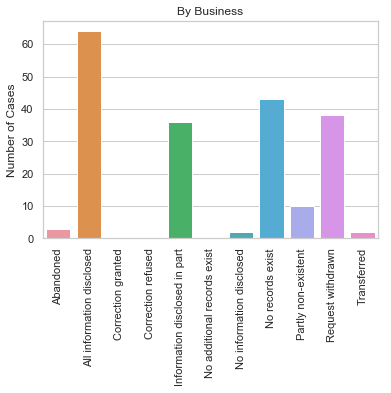

In [453]:
sns.set(style="whitegrid")
# ax = sns.barplot(x = df_byDecision.columns, y = df_byDecision.loc[ 'Business' , : ], data = df_byDecision)
ax = sns.barplot(data = df_byDecision[ 0 : 1])
ax.set(ylabel = 'Number of Cases', title = 'By Business')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

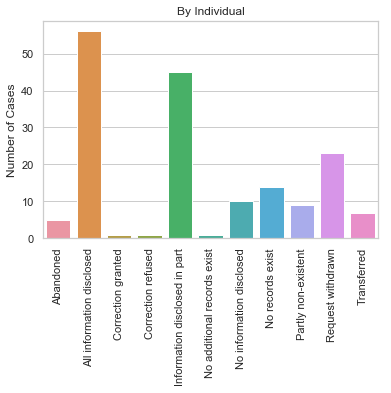

In [452]:
sns.set(style="whitegrid")
# ax = sns.barplot(x = df_byDecision.columns, y = df_byDecision.loc[ 'Business' , : ], data = df_byDecision)
ax = sns.barplot(data = df_byDecision[1: 2])
ax.set(ylabel = 'Number of Cases', title = 'By Individual')
plt.xticks(rotation=90)

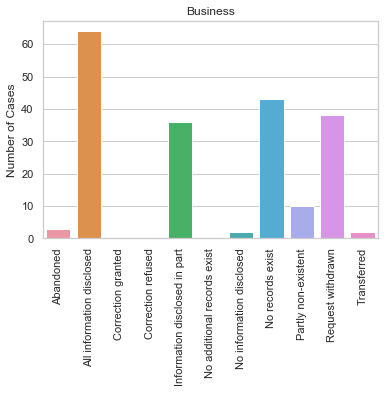

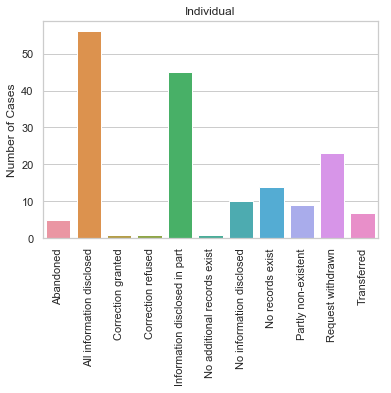

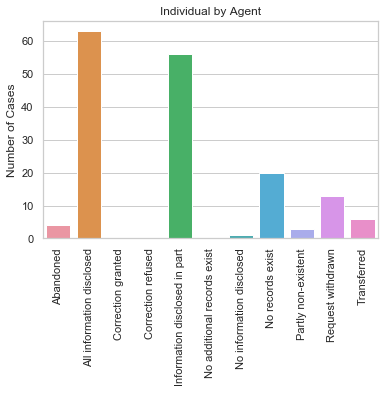

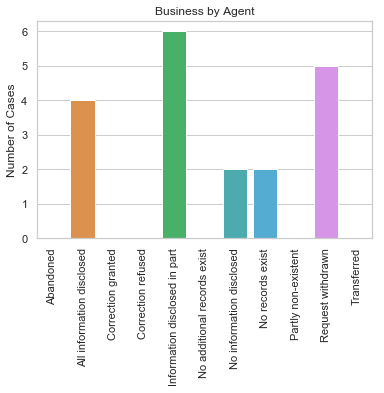

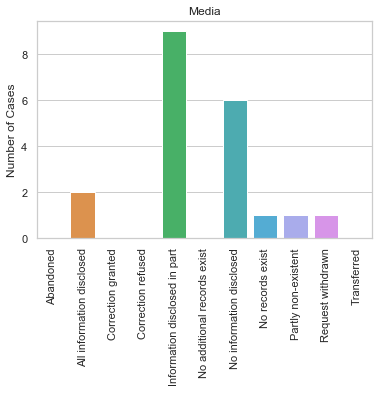

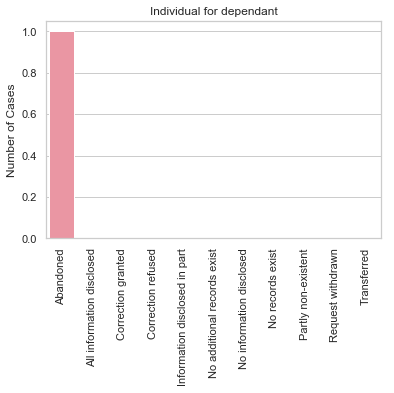

In [456]:
counter = 0

for source in source_types:
    sns.set(style="whitegrid")
    # ax = sns.barplot(x = df_byDecision.columns, y = df_byDecision.loc[ 'Business' , : ], data = df_byDecision)
    ax = sns.barplot(data = df_byDecision[counter: counter+1])
    ax.set(ylabel = 'Number of Cases', title = source)
    plt.xticks(rotation=90)
    plt.show()
    counter += 1

In [457]:
# ObjectID is just the order in which the requests arrived during the year.
sub_df_byDecision = df_byDecision.drop(columns=['Abandoned', 'Correction granted', 'Correction refused',
                                                'No additional records exist', 'No records exist', 
                                                'Partly non-existent', 'Request withdrawn', 'Transferred'])


In [458]:
sub_df_byDecision

,All information disclosed,Information disclosed in part,No information disclosed
Business,64,36,2
Individual,56,45,10
Individual by Agent,63,56,1
Business by Agent,4,6,2
Media,2,9,6
Individual for dependant,0,0,0


In [459]:
norm_sub_df_byDecision = sub_df_byDecision.div(sub_df_byDecision.sum(axis=1), axis=0)

In [460]:
norm_sub_df_byDecision

,All information disclosed,Information disclosed in part,No information disclosed
Business,0.627451,0.352941,0.019608
Individual,0.504505,0.405405,0.090090
Individual by Agent,0.525000,0.466667,0.008333
Business by Agent,0.333333,0.500000,0.166667
Media,0.117647,0.529412,0.352941
Individual for dependant,NaN,NaN,NaN


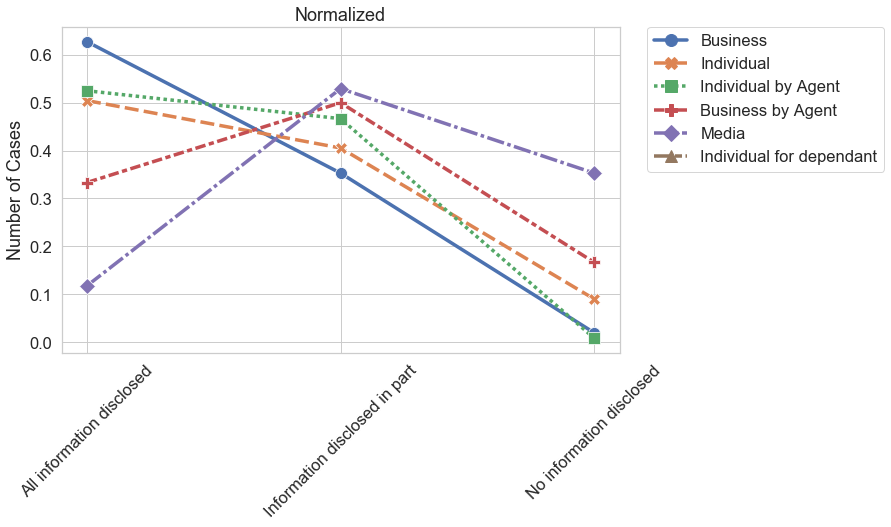

In [522]:
plt.figure(figsize=(10, 6))
#sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3.5, "lines.markersize":12.0})
# ax = sns.barplot(x = df_byDecision.columns, y = df_byDecision.loc[ 'Business' , : ], data = df_byDecision)
ax = sns.lineplot(data = norm_sub_df_byDecision.T, markers=True)
ax.set(ylabel = 'Number of Cases', title = 'Normalized')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05,1), loc = 2, borderaxespad = 0.)



In [533]:
import string
import re
import spacy
from spacy.lang.en import English
parser = English()
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
import nltk

In [531]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [529]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [578]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/bertaerodriguez-
[nltk_data]     milla/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [530]:
STOPLIST = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS)+ list(STOPWORDS))
SYMBOLS = " ".join(string.punctuation).split(" ") + ["-", "...", "”", "”"]


In [ ]:
def tokenizeText(sample):
    tokens = parser(sample)
    lemmas = []
    for tok in tokens:
        lemmas.append(tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_)
    tokens = lemmas
    tokens = [tok for tok in tokens if tok not in STOPLIST]
    tokens = [tok for tok in tokens if tok not in SYMBOLS]
    return tokens

In [579]:
def cleanText(text):
    text = text.strip().replace("\n", " ").replace("\r", " ")
    #text = text.lower()
    return text

In [553]:
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [554]:
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    

In [556]:
def prepare_text_for_lda(text):
    text = cleanText(text)
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in STOPLIST]
    tokens = [token for token in tokens if token not in SYMBOLS]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

In [561]:
all_text = adf['Summary_of_Request']
print(all_text[:10])
#all_text = all_text.strip().replace("\n", " ").replace("\r", " ")

0    Minutes of Service Delivery Subcommittee of ES...
1    Public Health inspection reports for the {loca...
2    Public Health inspection records for {location...
3    Public Health inspection records for {address ...
4    Vendor list report with total of year-to-date ...
5    Public Health inspection file for {name remove...
6    Scope of work and deliverables sections of con...
7    Number of contracts and dollar amount of contr...
8    Public Health inspection report regarding a co...
9    Phase I environmental site assessment regardin...
Name: Summary_of_Request, dtype: object


In [563]:
all_text_merged = 'a'

for lines in range(0,len(all_text)):
    all_text_merged = all_text_merged + ' ' + all_text[lines]

In [617]:
print(all_text_merged)

a Minutes of Service Delivery Subcommittee of ESCAC for period of January 1, 1997 to January 13, 1999. Public Health inspection reports for the {location removed}, Kitchener for the past 3 years. Public Health inspection records for {location removed}, Cambridge for the past 2 years. Public Health inspection records for {address removed}, Cambridge, relating to sink odours in 1994. Vendor list report with total of year-to-date purchases at fiscal year end for 1996, 1997, and 1998. Public Health inspection file for {name removed} at {location removed} regarding requester's dismissal from employment. Scope of work and deliverables sections of contract between Region of Waterloo and {company name removed} for Waterloo Regional Master Transportation Plan. Number of contracts and dollar amount of contracts between Region of Waterloo and {company name removed} for the last 5 years. Public Health inspection report regarding a complaint about contamination found in coffee cup at {location remo

In [580]:
text_data = []

tokens = prepare_text_for_lda(all_text_merged)
text_data.append(tokens)
unigrams = tokens

In [581]:
text_data

[['minutes',
  'service',
  'delivery',
  'subcommittee',
  'escac',
  'period',
  'january',
  'january',
  'public',
  'health',
  'inspection',
  'report',
  'location',
  'remove',
  'kitchener',
  'years',
  'public',
  'health',
  'inspection',
  'record',
  'location',
  'remove',
  'cambridge',
  'years',
  'public',
  'health',
  'inspection',
  'record',
  'address',
  'remove',
  'cambridge',
  'relate',
  'odour',
  'vendor',
  'report',
  'total',
  'purchase',
  'fiscal',
  'public',
  'health',
  'inspection',
  'remove',
  'location',
  'remove',
  'regard',
  'requester',
  'dismissal',
  'employment',
  'scope',
  'deliverable',
  'section',
  'contract',
  'region',
  'waterloo',
  'company',
  'remove',
  'waterloo',
  'regional',
  'master',
  'transportation',
  'number',
  'contract',
  'dollar',
  'contract',
  'region',
  'waterloo',
  'company',
  'remove',
  'years',
  'public',
  'health',
  'inspection',
  'report',
  'regard',
  'complaint',
  'contaminati

In [568]:
print(unigrams[:25])

['minutes', 'service', 'delivery', 'subcommittee', 'escac', 'period', 'january', 'january', 'public', 'health', 'inspection', 'report', 'location', 'remove', 'kitchener', 'years', 'public', 'health', 'inspection', 'record', 'location', 'remove', 'cambridge', 'years', 'public']


In [569]:
len(unigrams)

5096

In [587]:
bigrams = nltk.bigrams(unigrams)
trigrams = nltk.trigrams(unigrams)

# look at the most common. 
from collections import Counter

unigrams_counter = Counter(unigrams)
bigrams_counter = Counter(bigrams)
trigrams_counter = Counter(trigrams)

In [589]:
print(len(unigrams_counter))
print('\n')
for unigram in unigrams_counter.most_common(20):
    print(unigram)

1024


('remove', 284)
('record', 136)
('removed}.', 123)
('address', 123)
('ontario', 121)
('waterloo', 119)
('environmental', 115)
('assessment', 108)
('works', 102)
('phase', 99)
('complete', 97)
('regard', 89)
('client', 77)
('relate', 73)
('kitchener', 70)
('region', 60)
('report', 51)
('cambridge', 46)
('company', 43)
('information', 42)


In [576]:
print(len(bigrams_counter))
print('\n')
for bigram in bigrams_counter.most_common(20):
    print(bigram)

2964


(('address', 'remove'), 112)
(('ontario', 'works'), 102)
(('environmental', 'assessment'), 99)
(('phase', 'environmental'), 97)
(('assessment', 'address'), 83)
(('complete', 'ontario'), 82)
(('works', 'client'), 67)
(('client', 'removed}.'), 55)
(('remove', 'kitchener'), 47)
(('region', 'waterloo'), 45)
(('remove', 'waterloo'), 39)
(('remove', 'cambridge'), 33)
(('location', 'remove'), 32)
(('removed}.', 'complete'), 30)
(('record', 'relate'), 30)
(('record', 'regard'), 28)
(('public', 'health'), 26)
(('company', 'remove'), 24)
(('river', 'transit'), 21)
(('grand', 'river'), 21)


In [577]:
print(len(trigrams_counter))
print('\n')
for trigram in trigrams_counter.most_common(20):
    print(trigram)

3781


(('phase', 'environmental', 'assessment'), 96)
(('environmental', 'assessment', 'address'), 83)
(('complete', 'ontario', 'works'), 81)
(('assessment', 'address', 'remove'), 80)
(('ontario', 'works', 'client'), 67)
(('works', 'client', 'removed}.'), 54)
(('address', 'remove', 'kitchener'), 36)
(('removed}.', 'complete', 'ontario'), 28)
(('address', 'remove', 'waterloo'), 28)
(('address', 'remove', 'cambridge'), 23)
(('grand', 'river', 'transit'), 21)
(('remove', 'kitchener', 'phase'), 20)
(('ontario', 'works', 'removed}.'), 20)
(('kitchener', 'phase', 'environmental'), 20)
(('public', 'health', 'inspection'), 16)
(('removed}.', 'phase', 'environmental'), 15)
(('rabies', 'control', 'investigation'), 14)
(('waterloo', 'phase', 'environmental'), 13)
(('client', 'removed}.', 'complete'), 13)
(('remove', 'waterloo', 'phase'), 12)


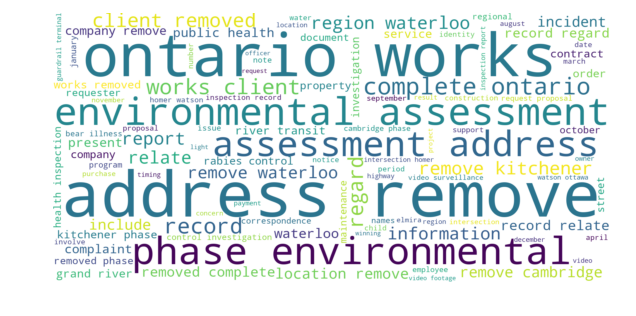

In [618]:
wordcloud1 = WordCloud(
                stopwords=STOPLIST,
                background_color='white',
                width=2000,
                height=1000,
                max_words=100
            ).generate(" ".join(unigrams))
plt.figure( figsize=(10,5))
plt.imshow(wordcloud1, interpolation="bilinear", aspect='auto')
plt.axis('off')
plt.show()

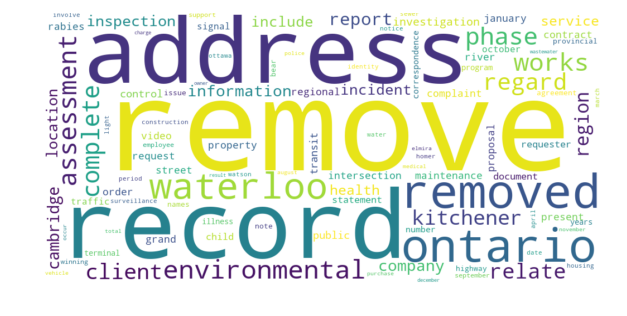

In [619]:
wordcloud2 = WordCloud(
                stopwords=STOPLIST,
                background_color='white',
                width=1000,
                height=500,
                collocations=False,
                max_words=100
            ).generate(" ".join(unigrams))
plt.figure( figsize=(10,5))
plt.imshow(wordcloud2, interpolation="bilinear", aspect='auto')
plt.axis('off')
plt.show()

In [597]:
unigrams_counter

Counter({'restriction': 4,
         'processing': 1,
         'permit': 2,
         'hourly': 1,
         'present': 26,
         'exceedance': 1,
         'selling': 2,
         'landing': 1,
         'disability': 3,
         'supplier': 2,
         'total': 9,
         'fraud': 1,
         'date': 10,
         'community': 2,
         'salvage': 1,
         'approve': 2,
         'clearing': 2,
         'process': 1,
         'project': 7,
         'sustain': 1,
         'seven': 1,
         'removed}or': 1,
         'loft': 1,
         'baby': 1,
         'complaint': 25,
         'for{address': 2,
         'translation': 1,
         'fluoridate': 1,
         '2004/4/5': 1,
         'access': 1,
         'pq2014': 3,
         'integrate': 1,
         'odour': 1,
         'roundabout': 1,
         'outside': 3,
         'government': 1,
         'remove': 284,
         'pedestrian': 3,
         'charge': 8,
         'bechtel': 1,
         'laboratory': 2,
         'point': 1,
      

In [621]:
# {address removed}, {name removed} {names removed} {location removed} {company name removed}
# {intersection removed}
# {request number removed}

import re

In [764]:
#regex_phrase = r"\{(\w+)(\s*)(\w*)\}"
new_stop_words=[]
regex_phrase = r'\{\w+\s*\w*\s*\w*\s*\w*\s*\w*\s*\w*\}'
matches = re.findall(regex_phrase, all_text_merged)
for match in matches:
    print(match)
    new_stop_words.append(match)
    #print(match[0])
    

{location removed}
{location removed}
{address removed}
{name removed}
{location removed}
{company name removed}
{company name removed}
{location removed}
{addresses removed}
{name removed}
{names removed}
{name removed}
{location removed}
{name removed}
{name removed}
{Name removed}
{name removed}
{name removed}
{name removed}
{location removed}
{name removed}
{location removed}
{location removed}
{name removed}
{date removed}
{name removed}
{addresses removed}
{company name removed}
{name removed}
{name removed}
{name removed}
{names removed}
{names removed}
{locations removed}
{location removed}
{company name removed}
{name removed}
{name removed}
{name removed}
{company name removed}
{locations removed}
{address removed}
{name removed}
{location removed}
{names removed}
{names removed}
{intersection removed}
{location removed}
{company name removed}
{name removed}
{name removed}
{name removed}
{name removed}
{name removed}
{name removed}
{name removed}
{name removed}
{name removed}

In [765]:
#print(new_stop_words)
new_stop_words = set(new_stop_words)
#print(new_stop_words)
new_stop_words = list(new_stop_words)
#print(new_stop_words[0])
#new_stop_words[0] = new_stop_words[0].replace('\'','')
print(new_stop_words)

['{company names removed}', '{company name removed}', '{facility removed}', '{locations removed}', '{address}', '{developer removed}', '{request number removed}', '{address removed}', '{organization name removed}', '{orgnization name removed}', '{companies removed}', '{institutions removed}', '{individual by agent}', '{business removed}', '{company name and address removed}', '{name and position removed}', '{name removed}', '{company removed}', '{addresses removed}', '{Name removed}', '{date removed}', '{intersection removed}', '{street name removed}', '{restaurant name removed}', '{names removed}', '{Company name removed}', '{location removed}', '{restaurant removed}']


In [766]:
len(new_stop_words)

28

In [767]:
new_stop_words[1]

'{company name removed}'

In [768]:
str(new_stop_words[1])

'{company name removed}'

In [769]:
#all_text_merged_removed = all_text_merged.replace(r'\{\w+\s*\w*\}', '')

In [774]:
all_text_merged_removed = all_text_merged
for index in range(0, len(new_stop_words)):
    print(new_stop_words[index])
    all_text_merged_removed = all_text_merged_removed.replace(new_stop_words[index], '')

{company names removed}
{company name removed}
{facility removed}
{locations removed}
{address}
{developer removed}
{request number removed}
{address removed}
{organization name removed}
{orgnization name removed}
{companies removed}
{institutions removed}
{individual by agent}
{business removed}
{company name and address removed}
{name and position removed}
{name removed}
{company removed}
{addresses removed}
{Name removed}
{date removed}
{intersection removed}
{street name removed}
{restaurant name removed}
{names removed}
{Company name removed}
{location removed}
{restaurant removed}


In [775]:
all_text_merged_removed

'a Minutes of Service Delivery Subcommittee of ESCAC for period of January 1, 1997 to January 13, 1999. Public Health inspection reports for the , Kitchener for the past 3 years. Public Health inspection records for , Cambridge for the past 2 years. Public Health inspection records for , Cambridge, relating to sink odours in 1994. Vendor list report with total of year-to-date purchases at fiscal year end for 1996, 1997, and 1998. Public Health inspection file for  at  regarding requester\'s dismissal from employment. Scope of work and deliverables sections of contract between Region of Waterloo and  for Waterloo Regional Master Transportation Plan. Number of contracts and dollar amount of contracts between Region of Waterloo and  for the last 5 years. Public Health inspection report regarding a complaint about contamination found in coffee cup at , Cambridge. Phase I environmental site assessment regarding sewer use at . Complete fiscal year end vendor report for years 1996 to 1998 and

In [776]:
tokens_rm = prepare_text_for_lda(all_text_merged_removed)
unigrams_rm = tokens_rm
bigrams_rm = nltk.bigrams(unigrams_rm)
trigrams_rm = nltk.trigrams(unigrams_rm)

unigrams_counter_rm = Counter(unigrams_rm)
bigrams_counter_rm = Counter(bigrams_rm)
trigrams_counter_rm = Counter(trigrams_rm)

In [777]:
print(len(unigrams_counter_rm))
print('\n')
for unigram in unigrams_counter_rm.most_common(20):
    print(unigram)

1018


('record', 136)
('ontario', 121)
('waterloo', 119)
('environmental', 115)
('assessment', 108)
('works', 102)
('phase', 99)
('complete', 97)
('regard', 89)
('client', 77)
('relate', 73)
('kitchener', 70)
('region', 60)
('report', 51)
('cambridge', 46)
('information', 42)
('inspection', 39)
('incident', 37)
('include', 37)
('health', 35)


In [778]:
print(len(bigrams_counter_rm))
print('\n')
for bigram in bigrams_counter_rm.most_common(20):
    print(bigram)

2869


(('ontario', 'works'), 102)
(('environmental', 'assessment'), 99)
(('phase', 'environmental'), 97)
(('complete', 'ontario'), 84)
(('works', 'client'), 67)
(('region', 'waterloo'), 45)
(('record', 'relate'), 30)
(('assessment', 'kitchener'), 30)
(('record', 'regard'), 29)
(('public', 'health'), 26)
(('assessment', 'waterloo'), 23)
(('assessment', 'cambridge'), 22)
(('river', 'transit'), 21)
(('grand', 'river'), 21)
(('kitchener', 'phase'), 20)
(('rabies', 'control'), 19)
(('health', 'inspection'), 16)
(('client', 'complete'), 14)
(('control', 'investigation'), 14)
(('waterloo', 'phase'), 13)


In [779]:
print(len(trigrams_counter_rm))
print('\n')
for trigram in trigrams_counter_rm.most_common(20):
    print(trigram)

3539


(('phase', 'environmental', 'assessment'), 96)
(('complete', 'ontario', 'works'), 82)
(('ontario', 'works', 'client'), 67)
(('environmental', 'assessment', 'kitchener'), 30)
(('environmental', 'assessment', 'cambridge'), 22)
(('grand', 'river', 'transit'), 21)
(('kitchener', 'phase', 'environmental'), 20)
(('environmental', 'assessment', 'waterloo'), 20)
(('assessment', 'kitchener', 'phase'), 18)
(('public', 'health', 'inspection'), 16)
(('works', 'client', 'complete'), 14)
(('rabies', 'control', 'investigation'), 14)
(('client', 'complete', 'ontario'), 14)
(('waterloo', 'phase', 'environmental'), 13)
(('ontario', 'works', 'complete'), 13)
(('cambridge', 'phase', 'environmental'), 11)
(('works', 'complete', 'ontario'), 11)
(('assessment', 'waterloo', 'phase'), 11)
(('assessment', 'cambridge', 'phase'), 10)
(('works', 'client', 'phase'), 9)


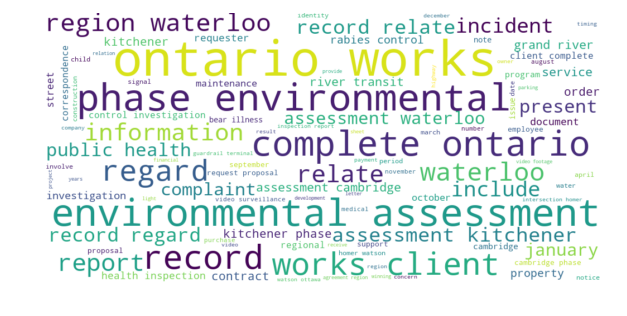

In [780]:
wordcloud3 = WordCloud(
                stopwords=STOPLIST,
                background_color='white',
                width=1000,
                height=500,
                max_words=100
            ).generate(" ".join(unigrams_rm))
plt.figure( figsize=(10,5))
plt.imshow(wordcloud3, interpolation="bilinear", aspect='auto')
plt.axis('off')
plt.show()

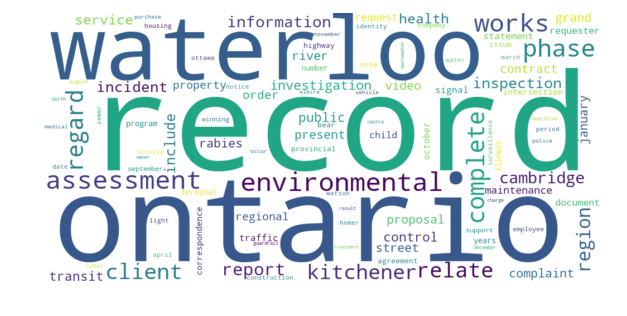

In [781]:
wordcloud4 = WordCloud(
                stopwords=STOPLIST,
                background_color='white',
                width=1000,
                height=500,
                collocations=False,
                max_words=100
            ).generate(" ".join(unigrams_rm))
plt.figure( figsize=(10,5))
plt.imshow(wordcloud4, interpolation="bilinear", aspect='auto')
plt.axis('off')
plt.show()